In [170]:
import networkx as nx
import pandas as pd
import ast
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
data = pd.read_csv('../../../data/tweets.csv')


In [172]:
def label_RT(row):
    if isinstance(row['text'], str):
        if row['text'][:2] == "RT":
            return 1
    return 0

In [173]:
data['RT'] = data.apply(lambda row: label_RT(row), axis=1)

In [174]:
data = data[data['RT'] != 1]

In [149]:
len(data)

203482

In [106]:
thing = ast.literal_eval("[1,2,3]")
thing.append('sup')
thing

[1, 2, 3, 'sup']

In [22]:
def createGraph(data, directed=False, only_trolls=False):
    nodes = {}
    edges = {}
    G = nx.Graph()
    trolls = set(list(data['user_key']))
    if directed:
        G = nx.DiGraph()
    for index, row in data.iterrows():
        init_node = row['user_key']
        if init_node not in nodes:
            nodes[init_node] = {'start_date': row['created_at'], 'end_date': row['created_at']}
            G.add_node(init_node, start_date=row['created_at'], end_date=row['created_at'])
        else:
            node_start_date = float(nodes[init_node]['start_date'])
            node_end_date = float(nodes[init_node]['end_date'])
            new_date = float(row['created_at'])
            if new_date < node_start_date:
                nx.set_node_attributes(G, {init_node: {'start_date':row['created_at']}})
            if new_date > node_end_date:
                nx.set_node_attributes(G, {init_node: {'end_date':row['created_at']}})
        mentioned_list = ast.literal_eval(row['mentions'])
        for user in mentioned_list:
            if user not in nodes and (not only_trolls or user in trolls):
                nodes[user] = {'start_date': row['created_at'], 'end_date': row['created_at']}
                G.add_node(user, start_date=row['created_at'], end_date=row['created_at'])
            elif user in nodes:
                node_start_date = float(nodes[user]['start_date'])
                node_end_date = float(nodes[user]['end_date'])
                new_date = float(row['created_at'])
                if new_date < node_start_date:
                    nx.set_node_attributes(G, {user: {'start_date':row['created_at']}})
                if new_date > node_end_date:
                    nx.set_node_attributes(G, {user: {'end_date':row['created_at']}})
            if (init_node, user) in edges:
                weight = edges[(init_node, user)]['weight']
                dates = edges[(init_node, user)]['dates']
                dates.append(str(row['created_at']))
                dates_string = ','.join(dates)
                edges[(init_node, user)]['weight'] = weight+1
                G.add_edge(init_node, user, date=dates_string, weight=weight+1)
            else:
                edges[(init_node, user)] = {'dates': [str(row['created_at'])], 'weight': 1}
                G.add_edge(init_node, user, date=row['created_at'], weight=1)
    return G

In [176]:
def createGraph(data, accounts, directed=False, only_trolls=False):
    nodes = {}
    edges = {}
    G = nx.Graph()
    tweets = []
    trolls = set(list(data['user_key']))
    accounts_lower = [x.lower() for x in accounts]
    if directed:
        G = nx.DiGraph()
    for index, row in data.iterrows():
        init_node = row['user_key']
        mentioned_list = ast.literal_eval(row['mentions'])
        account_found = False
        for user in mentioned_list:
            if (user.lower() in accounts_lower):
                print(mentioned_list)
                account_found = True
                if user not in nodes and (not only_trolls or user in trolls):
                    nodes[user] = 1
                    G.add_node(user)
                if (init_node, user) in edges:
                    pass
                else:
                    edges[(init_node, user)] = 1
                    G.add_edge(init_node, user)
        if init_node not in nodes and account_found:
            nodes[init_node] = 1
            G.add_node(init_node)
        if account_found:
            tweets.append(row)
    return G, tweets

In [177]:
G, tweets = createGraph(data, ["rt_america", "mike_pence", "drudge_report", "tedcruz", "seanhannity", "darren32895836", "dcexaminer", "teamtrump", "bfraser747", "prisonplanet", "mitchellvii", "dailycaller", "donaldjtrumpjr", "breitbartnews", "erictrump", "cernovich", "lindasuhler", "realalexjones", "realjameswoods", "realkingrobbo", "jamesokeefeiii", "megynkelly", "asamjulian", "carminezozzora", "johnkstahlusa", "lrihendry", "stevenwhirsch99", "gerfingerpoken2", "danscavino", "conservative_vw", "noltenc", "2alaw", "gerfingerpoken", "leahr77", "wdfx2eu7", "loudobbs", "ibdeditorials", "sandratxas", "drmartyfox", "jaredwyand", "networksmanager", "anncoulter", "always_trump", "magnifier661", "ingrahamangle", "ingodidotrust", "newtgingrich", "sheriffclarke", "christichat", "johnfromcranber", "weneedtrump", "dineshdsouza", "waynedupreeshow", "immigrant4trump", "cristinalaila1", "the_trump_train", "amrightnow", "juliet777777", "reince"])




['darren32895836']
['ingrahamangle']
['megynkelly', 'lessgovmorefun', 'newtgingrich']
['megynkelly', 'lessgovmorefun', 'newtgingrich']
['cruztribe', 'vickybrush', 'seanhannity', 'hillarycoughing', 'mike_pence', 'realdonaldtrump']
['cruztribe', 'vickybrush', 'seanhannity', 'hillarycoughing', 'mike_pence', 'realdonaldtrump']
['stevenwhirsch99']
['ibdeditorials', 'gerfingerpoken']
['ibdeditorials', 'gerfingerpoken']
['mitchellvii', 'alankrautpoker']
['daveleifer', 'brianstelter', 'cernovich']
['gerfingerpoken']
['waynedupreeshow']
['lindasuhler']
['donaldjtrumpjr']
['reince', 'petefrt']
['mitchellvii']
['danscavino', 'thefix', 'washingtonpost']
['bfraser747']
['mitchellvii']
['lindasuhler']
['bfraser747']
['amrightnow']
['weneedtrump']
['seanhannity', 'faithbased92']
['cnn', 'always_trump']
['bfraser747']
['magnifier661']
['bfraser747']
['amrightnow']
['cernovich']
['bfraser747']
['gerfingerpoken']
['loudobbs']
['dcexaminer']
['darren32895836']
['erictrump', 'ivankatrump', 'realdonaldtrum

['the_trump_train']
['mike_pence', 'realdonaldtrump']
['ingrahamangle', 'realdonaldtrump']
['realdonaldtrump', 'amrightnow']
['evilhillarypics', 'always_trump']
['sandratxas']
['ingrahamangle']
['breitbartnews', 'scottnshan1']
['medianpolitics', 'marivigarces', 'tedcruz']
['lrihendry']
['ajdelgado13', 'foxnews', 'erictrump']
['wdfx2eu7']
['immigrant4trump']
['mitchellvii']
['maria4america', 'seanhannity']
['realalexjones', 'craigmiller383']
['jkinneybundy', 'mitchellvii']
['hillaryclinton', 'newtgingrich', 'seanhannity']
['hillaryclinton', 'newtgingrich', 'seanhannity']
['dcexaminer']
['leahr77']
['wdfx2eu7']
['crosswindlive', 'conservative_vw']
['stevenwhirsch99']
['magnifier661']
['waynedupreeshow']
['mike_pence', 'genflynn', 'realdonaldtrump']
['the_trump_train']
['jamesokeefeiii']
['realdonaldtrump', 'seanhannity']
['newtgingrich']
['mitchellvii']
['realdonaldtrump', 'rbcreamer', 'potus', 'flotus', 'jamesokeefeiii']
['danscavino']
['magnifier661']
['seanhannity', 'realdonaldtrump']

['prisonplanet']
['gerfingerpoken', 'ibdeditorials']
['gerfingerpoken', 'ibdeditorials']
['robbymook', 'cernovich']
['donaldjtrumpjr', 'dailycaller']
['donaldjtrumpjr', 'dailycaller']
['cnn', 'always_trump']
['jesseoshow', 'always_trump']
['asamjulian']
['lindasuhler']
['the_trump_train']
['waynedupreeshow']
['always_trump']
['noltenc']
['cristinalaila1']
['evan_mcmullin', 'reince', 'realdonaldtrump']
['asamjulian']
['christichat', 'vrwctexan', 'stonewall_77']
['breitbartnews', 'loudobbs']
['breitbartnews', 'loudobbs']
['breitbartnews', 'chuckwoolery']
['darren32895836']
['blisstabitha', 'lodisilverado', 'steph93065', 'gaetasusan', 'realdonaldtrump', 'carminezozzora', 'choosetobfree', 'stonewall_77']
['anomaly1', 'danscavino']
['mrtom3560', 'sandratxas']
['bfraser747']
['dailycaller']
['magnifier661']
['drudge_report']
['seanhannity', 'foxandfriends', 'mazurekrob', 'realdonaldtrump']
['mitchellvii', 'gadflymorse', 'youniquestylist']
['ingodidotrust']
['johnfromcranber']
['dineshdsouza'

['teamtrump', 'realdonaldtrump']
['bfraser747']
['lindasuhler']
['2alaw']
['prisonplanet']
['darren32895836']
['always_trump']
['conservative_vw']
['wdfx2eu7']
['dcexaminer', 'trumpispatriot']
['asamjulian']
['ingodidotrust']
['ingrahamangle']
['carminezozzora', 'megynkelly']
['carminezozzora', 'megynkelly']
['rt_america']
['newtgingrich', 'seanhannity']
['newtgingrich', 'seanhannity']
['mitchellvii']
['prisonplanet']
['owillis', 'seanhannity']
['donaldjtrumpjr']
['stevenwhirsch99']
['jamesokeefeiii']
['kevinjacksontbs', 'livelifecorazy', 'immigrant4trump']
['mitchellvii']
['mitchellvii']
['codeaud', 'realdonaldtrump', 'sheriffclarke']
['gerfingerpoken']
['jaredwyand']
['amrightnow']
['amrightnow']
['debbgv', 'megynkelly', 'moelleithee']
['leahr77', 'trumpmypres']
['donaldjtrumpjr']
['seanhannity', 'douglasmesnard']
['lrihendry']
['mitchellvii', 'lepapillon01']
['wdfx2eu7']
['lindasuhler']
['christichat']
['rt_america']
['leahr77']
['bfraser747']
['skycop1', 'realjameswoods', 'mh_liber

['cernovich', 'basedmattforney']
['lindasuhler']
['carminezozzora', 'jko417']
['donaldjtrumpjr']
['prisonplanet']
['amrightnow']
['mitchellvii']
['rt_america']
['hillaryclinton', 'magnifier661']
['loudobbs', 'realdonaldtrump']
['crystal4trump', 'seanhannity', 'datrumpnation1', 'hillaryclinton', 'mitchellvii']
['crystal4trump', 'seanhannity', 'datrumpnation1', 'hillaryclinton', 'mitchellvii']
['bfraser747', 'realdonaldtrump']
['waynedupreeshow']
['cnn', 'foxnews', 'networksmanager', 'nbc', 'cbs', 'msnbc', 'abc', 'cristinalaila1']
['cnn', 'foxnews', 'networksmanager', 'nbc', 'cbs', 'msnbc', 'abc', 'cristinalaila1']
['juliet777777']
['erinlichnovsky', 'drmartyfox']
['snepcni', 'dcexaminer']
['gerfingerpoken2']
['kdscioscia', 'breitbartnews']
['donaldjtrumpjr']
['lrihendry', 'realdonaldtrump']
['ricky_vaughn99', 'breitbartnews', 'teamtrump', 'joenbc', '__abramovich', 'cernovich']
['ricky_vaughn99', 'breitbartnews', 'teamtrump', 'joenbc', '__abramovich', 'cernovich']
['ricky_vaughn99', 'bre

['jko417', 'carminezozzora']
['cristinalaila1']
['donaldjtrumpjr']
['waynedupreeshow']
['lindasuhler']
['howardstern', 'judgejeanine', 'cnn', 'foxnews', 'sheriffclarke', 'judgenap', 'rudygiulianigop', 'gulfatlanticind']
['darren32895836']
['lindasuhler']
['breitbartnews', 'sonofliberty357']
['noltenc']
['realdonaldtrump', 'erictrump', 'ladylibertea']
['breitbartnews', 'redrivergrl']
['realdonaldtrump', 'danscavino']
['mitchellvii']
['christichat']
['realjameswoods']
['danscavino']
['lrihendry']
['bobmacaz', 'breitbartnews']
['wdfx2eu7']
['johnkstahlusa']
['wikileaks', 'prisonplanet']
['anncoulter']
['realdonaldtrump', 'danscavino', 'ivankatrump']
['networksmanager']
['stevesgoddard', 'australian', 'megynkelly']
['rt_america']
['noltenc']
['danscavino', 'realdonaldtrump']
['teamtrump']
['mitchellvii']
['danscavino', 'erictrump']
['danscavino', 'erictrump']
['darren32895836']
['waynedupreeshow']
['prisonplanet', 'markthesite', 'carminezozzora', 'patrick_hostis']
['prisonplanet', 'markthe

['prisonplanet']
['mitchellvii']
['hillaryclinton', 'bfraser747']
['gerfingerpoken', 'ibdeditorials', 'hillaryclinton']
['gerfingerpoken', 'ibdeditorials', 'hillaryclinton']
['realdonaldtrump', 'vivelafra', 'danscavino']
['danscavino']
['cernovich']
['shennafoxmusic', 'mike_pence']
['realalexjones']
['lagartija_nix', 'dailycaller']
['amrightnow']
['dbhnbuckhead', 'loudobbs']
['foxnews', 'hillaryclinton', 'carminezozzora', 'cnn']
['asamjulian']
['vrwctexan', 'stonewall_77', 'christichat']
['bfraser747']
['danscavino', 'realdonaldtrump']
['darren32895836', 'teamcavuto']
['lindasuhler']
['anncoulter']
['gerfingerpoken']
['cernovich']
['sheriffclarke', 'realdonaldtrump']
['networksmanager', 'cspandemocrat']
['always_trump', 'pa_for_trump', 'gregaron']
['weneedtrump']
['dcexaminer']
['amrightnow']
['stevenwhirsch99']
['realkingrobbo']
['mediaite', 'realdonaldtrump', 'hillaryclinton', 'megynkelly', 'seanhannity', 'patrici15767099']
['mediaite', 'realdonaldtrump', 'hillaryclinton', 'megynkell

['carminezozzora']
['anncoulter', 'democrat_4trump']
['itsabouttime18', 'hillaryclinton', 'seanhannity']
['mitchellvii']
['speakerryan', 'reince', 'donaldtrumpwall']
['juliecomer3', 'mitchellvii']
['johnfromcranber']
['prisonplanet']
['networksmanager', 'realdonaldtrump']
['jasonmillerindc', 'michaelcohen212', 'danscavino', 'djt4prez']
['erictrump']
['linkxone', 'mitchellvii']
['asamjulian']
['realdonaldtrump', 'cernovich', 'trumpette01']
['genflynn', 'realdonaldtrump', 'charlesgrimm8', 'mike_pence']
['newtgingrich']
['fishinchickga', 'realdonaldtrump', 'the_trump_train']
['drmartyfox']
['johnkstahlusa']
['ingrahamangle', 'lifezette', 'realdonaldtrump']
['reince', 'chucknellis', 'tgradous', '1911g_fan', 'banditgolf', 'lonestarmomcom']
['teamtrump']
['carminezozzora', 'billmaher']
['amrightnow']
['ibdeditorials', 'gerfingerpoken']
['ibdeditorials', 'gerfingerpoken']
['dineshdsouza', 'realdonaldtrump']
['asamjulian']
['darren32895836']
['lindasuhler']
['juliet777777']
['shivashaktam', 'b

['darren32895836']
['lougeese', 'marilyn_landon', 'breitbartnews']
['lindasuhler']
['asamjulian']
['lindasuhler']
['darren32895836']
['stevenwhirsch99']
['asamjulian']
['foxbusiness', 'heytammybruce', 'loudobbs', 'tony4ny', 'realdonaldtrump']
['therreport', 'chief1787', 'mh_liberal', 'slone', 'vfw_vet', 'lindasuhler', 'skycop1']
['erictrump', 'pudingtane']
['foxnews', 'dbhnbuckhead', 'donaldjtrumpjr', 'davidwright1957']
['lindasuhler']
['prisonplanet']
['dailycaller', 'chuckrossdc']
['mitchellvii']
['magnifier661', 'trumpamerican']
['danscavino', 'realdonaldtrump']
['juliet777777']
['the_trump_train', 'jewel60187', 'melissaburges7']
['cristinalaila1']
['realkingrobbo']
['seanhannity', 'youngla03783349']
['drudge', 'realdonaldtrump', 'mitchellvii', 'sdxyz2']
['lindasuhler']
['realdonaldtrump', 'sheriffclarke', 'christichat']
['realdonaldtrump', 'sheriffclarke', 'christichat']
['mitchellvii']
['schotts', 'thefive', 'foxnews', 'dloesch', 'kurtschlichter', 'megynkelly']
['ingodidotrust']
[

['dineshdsouza']
['lindasuhler', 'ten_gop']
['loudobbs']
['lindasuhler']
['lrihendry']
['noltenc']
['mike_pence', 'genflynn', 'realdonaldtrump']
['jaredwyand']
['always_trump', 'hillaryclinton']
['realjameswoods', 'hillaryclinton']
['realdonaldtrump', 'teamtrump']
['drudge_report']
['gerfingerpoken']
['gerfingerpoken']
['donaldjtrumpjr']
['bfraser747']
['lindasuhler', 'ajdelgado13']
['hillaryclinton', 'realdonaldtrump', 'teamtrump']
['christichat', 'sheriffclarke', 'realdonaldtrump']
['christichat', 'sheriffclarke', 'realdonaldtrump']
['jaredwyand']
['waynedupreeshow']
['wdfx2eu7']
['conservative_vw']
['lrihendry']
['dineshdsouza', 'hillaryclinton']
['lesliemtaylor1', 'breitbartnews']
['prisonplanet']
['teamtrump', 'realdonaldtrump', 'hillaryclinton']
['wdfx2eu7']
['lrihendry']
['lindasuhler']
['soopermexican', 'loudobbs']
['juliet777777']
['dailycaller']
['gerfingerpoken']
['lindasuhler']
['gerfingerpoken']
['rt_america']
['billclinton', 'bfraser747']
['realdonaldtrump', 'teamtrump']


['seanhannity', 'hillaryclinton']
['realdonaldtrump', 'hughhewitt', 'cernovich']
['brunelldonald', 'realdonaldtrump', 'mike_pence']
['breitbartnews', 'trumpquility1']
['mike_pence', 'fieldoffight', 'genflynn', 'realdonaldtrump', 'mflynnjr']
['lrihendry']
['bfraser747']
['sheriffclarke']
['dailycaller']
['juliet777777', 'jjauthor', 'hedgemastermb', 'lfs7']
['donaldjtrumpjr']
['darren32895836']
['christichat']
['chuckwoolery', 'breitbartnews']
['leahr77']
['fxnopinion', 'newtgingrich']
['realdonaldtrump', 'mailonline', 'loudobbs']
['carminezozzora']
['leahr77']
['gerfingerpoken']
['prisonplanet']
['mike_pence']
['amrightnow']
['danscavino', 'realdonaldtrump']
['donaldjtrumpjr']
['loudobbs']
['kerrijacobi', 'jaredwyand']
['loudobbs']
['foxbusiness', 'loudobbs']
['mitchellvii']
['mike_pence', 'realdonaldtrump']
['weneedtrump']
['johnkstahlusa']
['breitbartnews', 'mattlockeshow']
['cristinalaila1']
['cernovich', 'brianstelter']
['jaredwyand', 'jaketapper']
['wdfx2eu7']
['prisonplanet']
['rt

['tedcruz', 'markruffalo']
['carminezozzora', 'skb_sara', 'jko417', 'drmartyfox']
['carminezozzora', 'skb_sara', 'jko417', 'drmartyfox']
['lindasuhler']
['donaldjtrumpjr', 'realdonaldtrump', 'tamaraleighllc']
['drudge_report']
['2alaw']
['mike_pence']
['mitchellvii']
['mike_pence']
['amrightnow']
['realdonaldtrump', 'hillaryclinton', 'magnifier661']
['ingrahamangle']
['prisonplanet']
['rt_america']
['petepetretich', 'lindasuhler', 'docmurdock']
['gerfingerpoken2']
['ingodidotrust']
['seanhannity', 'pms5699']
['anncoulter', 'wackbardsnam', 'hillaryclinton']
['floridagators', 'mike_pence']
['johnkstahlusa']
['2alaw']
['dcexaminer']
['asamjulian']
['weneedtrump']
['olimauritania', 'cernovich']
['reince', 'mikebates', 'texastrue11', 'pupiczech']
['magnifier661', 'realdonaldtrump', 'nytimes']
['gerfingerpoken']
['magnifier661']
['teamtrump']
['dineshdsouza']
['realdonaldtrump', 'thehermancain', 'gerfingerpoken']
['gerfingerpoken2']
['johnfromcranber']
['jaredwyand']
['ingrahamangle']
['nolt

['gerfingerpoken2']
['realdonaldtrump', 'loudobbs']
['breitbartnews']
['jaredwyand']
['christichat']
['hillaryclinton', 'realjameswoods']
['jturnershow', 'vet4trump16', 'anthonyblunden', 'waynedupreeshow', 'housecracka', 'vickybrush', 'karlak916', 'sabine_durden', 'tina_writes']
['lindasuhler']
['rt_america']
['amrightnow']
['donaldjtrumpjr']
['carminezozzora']
['carminezozzora']
['bfraser747']
['mitchellvii']
['rt_america']
['mitchellvii']
['wdfx2eu7']
['stonewall_77', 'christichat', 'vrwctexan']
['lindasuhler']
['johnfromcranber']
['darren32895836']
['sandratxas']
['dailycaller']
['mitchellvii']
['conservative_vw']
['breitbartnews', 'racheka1']
['realdonaldtrump', 'mike_pence', 'bikers4trump']
['2alaw', 'realdonaldtrump']
['rt_america']
['darren32895836']
['noltenc']
['lindasuhler']
['cristinalaila1']
['cernovich']
['cernovich', 'jaredwyand', 'mitchellvii', 'dnc', 'donnabrazil', 'johnpodesta', 'bigwintrump', 'cylybu', 'umpire43']
['cernovich', 'jaredwyand', 'mitchellvii', 'dnc', 'don

['realalexjones']
['lindasuhler']
['always_trump']
['realdonaldtrump', 'loudobbs']
['darren32895836']
['networksmanager']
['immigrant4trump']
['mt_newman', 'dcexaminer']
['drmartyfox', 'danmartin_cards']
['realdonaldtrump', 'teamtrump']
['jaredwyand']
['christichat', 'sheriffclarke', 'realdonaldtrump']
['christichat', 'sheriffclarke', 'realdonaldtrump']
['ingodidotrust']
['mike_pence']
['lorettalynn', 'stevenwhirsch99', 'realdonaldtrump']
['lafayette41', 'cernovich']
['donaldjtrumpjr']
['johnfromcranber']
['wdfx2eu7']
['realalexjones']
['lrihendry']
['waynedupreeshow']
['stevenwhirsch99']
['cernovich']
['prisonplanet']
['wdfx2eu7']
['keitholbermann', 'newtgingrich']
['loudobbs']
['donaldjtrumpjr', 'danscavino', 'amrightnow']
['donaldjtrumpjr', 'danscavino', 'amrightnow']
['donaldjtrumpjr', 'danscavino', 'amrightnow']
['cernovich']
['ingodidotrust']
['ingrahamangle']
['amrightnow']
['johnkstahlusa']
['bfraser747']
['noltenc']
['tgowdysc', 'drmartyfox', 'rnrmaryland', 'zz201', 'hillarycl

['waynedupreeshow', 'mitchellvii', 'kazmierskir', 'barbmuenchen', 'kentwilliam94']
['waynedupreeshow', 'mitchellvii', 'kazmierskir', 'barbmuenchen', 'kentwilliam94']
['prisonplanet']
['stevenwhirsch99']
['pjdahling', 'outnumberedfnc', 'erictrump', 'julieroginsky']
['amrightnow']
['ingrahamangle']
['cnn', 'noltenc', 'wroughtironguy']
['sandratxas']
['prisonplanet']
['loudobbs', 'anomaly1', 'boilingcrude']
['darren32895836']
['dcexaminer']
['lindasuhler']
['sandratxas', '2alaw']
['sandratxas', '2alaw']
['realkingrobbo']
['rt_america']
['johnkstahlusa']
['hillaryclinton', 'jamesokeefeiii']
['johnfromcranber']
['bfraser747']
['bfraser747']
['socalmike_sd', 'loudobbs']
['realjameswoods']
['danscavino', 'governorsununu', 'teamtrump', 'realdonaldtrump']
['danscavino', 'governorsununu', 'teamtrump', 'realdonaldtrump']
['breitbartnews', 'perry1949']
['darren32895836']
['bfraser747']
['hillaryclinton', 'magnifier661']
['mike_pence']
['2alaw']
['magnifier661']
['mitchellvii']
['always_trump']
['j

['breitbartnews', 'aiiamericangiri']
['dailycaller']
['the_trump_train']
['2alaw']
['jamesokeefeiii', 'project_veritas']
['gerfingerpoken']
['weneedtrump']
['realdonaldtrump', 'teamtrump']
['timefortrumppp', 'scottpresler', 'networksmanager']
['lindasuhler']
['amrightnow']
['anselbelue', 'lindasuhler', 'kc8ysl', 'entheosshines']
['loudobbs']
['mayorrgiuliani', 'erictrump', 'realdonaldtrump']
['realkingrobbo']
['reince', 'hillaryclinton']
['prisonplanet']
['always_trump', 'latimes']
['sean_fintak', 'summerbackstrom', 'bigboater88', 'megynkelly', 'realdonaldtrump']
['danscavino']
['realalexjones', 'realdonaldtrump']
['realjameswoods']
['carminezozzora']
['rt_america']
['zfamilymn', 'mitchellvii']
['tteegar', 'realdonaldtrump', 'danscavino']
['mike_pence', 'realdonaldtrump']
['ibdeditorials', 'gerfingerpoken']
['ibdeditorials', 'gerfingerpoken']
['waynedupreeshow']
['gerfingerpoken', 'ibdeditorials']
['gerfingerpoken', 'ibdeditorials']
['dcexaminer', 'lolli_logan']
['wdfx2eu7', 'mike_penc

['braziliangirl32', 'trimmgi', 'michellewally64', 'realdonaldtrump', 'ivankatrump', 'darren32895836', 'don_vito_08', 'asamjulian', 'bbixby224']
['braziliangirl32', 'trimmgi', 'michellewally64', 'realdonaldtrump', 'ivankatrump', 'darren32895836', 'don_vito_08', 'asamjulian', 'bbixby224']
['loudobbs', 'realdonaldtrump']
['seanhannity']
['always_trump']
['lindasuhler']
['dailycaller']
['samtu78', 'hillaryclinton', 'reince']
['realdonaldtrump', 'mariasolnevada', 'cernovich']
['jaredwyand']
['danscavino', 'realdonaldtrump', 'diamondandsilk', '5945usartr']
['loudobbs']
['realdonaldtrump', 'amrightnow']
['sandratxas']
['weneedtrump']
['waynedupreeshow']
['realkingrobbo']
['patrioticpepe', 'mike_pence']
['xman_11530', 'mitchellvii']
['hillaryclinton', 'always_trump']
['teamtrump', 'realdonaldtrump']
['amrightnow']
['lougeese', 'marilyn_landon', 'breitbartnews']
['lindasuhler']
['magnifier661']
['johnkstahlusa']
['sandratxas']
['realdonaldtrump', 'ingrahamangle']
['teamtrump']
['jturnershow', '

['hillaryclinton', 'mike_pence']
['carminezozzora']
['amrightnow']
['waynedupreeshow']
['dailycaller', 'ethanrbarton']
['amrightnow']
['realalexjones']
['realkingrobbo']
['lindasuhler']
['realkingrobbo']
['tedcruz', 'realdonaldtrump', 'jcdwms']
['mitchellvii']
['cernovich']
['realdonaldtrump', 'teamtrump']
['lindasuhler']
['mike_pence']
['mgfreelance', 'mitchellvii']
['monakatoils', 'dailycaller']
['wdfx2eu7']
['noltenc']
['dcexaminer']
['jonmcclellan', 'kwteaparty', 'tedcruz', 'hillaryclinton']
['lindasuhler', 'hillaryclinton', 'greysanatomy112']
['always_trump']
['realdonaldtrump', 'sheriffclarke']
['mike_pence', 'hillaryclinton', 'barackobama']
['johnkstahlusa']
['realdonaldtrump', 'loudobbs']
['realdonaldtrump', 'teamtrump']
['drewwyatt', 'realdonaldtrump', 'leahr77', 'braveheart_usa', 'micafarha']
['realkingrobbo']
['amrightnow']
['bfraser747', 'hillaryclinton']
['realdonaldtrump', 'teamtrump']
['kurteichenwald', 'tedcruz', 'marcorubio']
['mitchellvii']
['foxnews', 'maddog5827', '

['danmannarino', 'rt_america']
['jaredwyand']
['ibdeditorials', 'gerfingerpoken']
['ibdeditorials', 'gerfingerpoken']
['drudge_report']
['lindasuhler']
['drudge_report']
['mitchellvii']
['rt_america']
['dailycaller']
['breitbartnews', 'independent_lab']
['stevenwhirsch99']
['mitchellvii']
['dkrwilliams', 'realjameswoods']
['johnkstahlusa']
['dineshdsouza']
['amrightnow', 'realdonaldtrump', 'danscavino']
['amrightnow', 'realdonaldtrump', 'danscavino']
['dineshdsouza']
['jamesokeefeiii', 'donaldjtrumpjr']
['jamesokeefeiii', 'donaldjtrumpjr']
['dharmabum77', 'breitbartnews', 'realdonaldtrump', 'kellyannepolls']
['sheriffclarke']
['cernovich']
['realdonaldtrump', 'danscavino']
['ingodidotrust']
['nmarco331', 'cernovich']
['johnfromcranber']
['realdonaldtrump', 'loudobbs']
['mike_pence']
['2alaw']
['realdonaldtrump', 'danscavino']
['johnkstahlusa']
['newtgingrich']
['juliet777777']
['darren32895836']
['davekoffer', 'seanhannity']
['ingodidotrust']
['asamjulian', 'chrissnyderfox']
['breitbar

In [178]:
clean_cluster = [{'troll': d['user_key'], 'mentions': d['mentions'], 'tweet': d['text']} for d in tweets]

In [179]:
df = pd.DataFrame(clean_cluster)

In [180]:
df

,troll,mentions,tweet
0,hyddrox,"[""darren32895836""]",RT @Darren32895836: After Hillary Clinton Caug...
1,finley1589,"[""ingrahamangle""]","RT @IngrahamAngle: ""The arrogance of Washingto..."
2,happkendrahappy,"[""megynkelly"",""lessgovmorefun"",""newtgingrich""]","RT @LessGovMoreFun: . ""I'm sick &amp; tired of..."
3,ameliebaldwin,"[""cruztribe"",""vickybrush"",""seanhannity"",""hilla...","RT @VickyBrush: Seriously, sheesh! @cruztribe ..."
4,cynthiamhunter,"[""stevenwhirsch99""]",RT @Stevenwhirsch99: Be the voice for these 4 ...
...,...,...,...
5038,ameliebaldwin,"[""amrightnow""]",RT @amrightnow: #Realdonaldtrump Follow The Ro...
5039,rh0lbr00k,"[""jaredwyand""]",RT @JaredWyand: Trump at Economic Club Of New ...
5040,hyddrox,"[""gerfingerpoken2""]",RT @gerfingerpoken2: Traitor Barack Hussein Ob...
5041,krasilnikovbor,"[""rt_america""]",RT @RT_America: 'We're going to repeal and rep...


In [189]:
words_list = [w for w in [d['text'].split() for d in tweets]]
bigrams = [b for l in df['tweet'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
words_list = [item for sublist in words_list for item in sublist]

In [193]:
bigrams = [i[0] + " " + i[1] for i in bigrams]
words_list = words_list + bigrams

In [194]:
import collections
counter = collections.Counter(words_list)
print(counter.most_common())

[('RT', 4932), ('the', 1567), ('to', 1463), ('Trump', 928), ('of', 900), ('a', 900), ('is', 845), ('Clinton', 834), ('in', 789), ('Hillary', 772), ('-', 706), ('for', 631), ('and', 571), ('Hillary Clinton', 532), ('RT @LindaSuhler:', 506), ('&amp;', 467), ('on', 463), ('@realDonaldTrump', 431), ('#MAGA', 382), ('The', 373), ('Obama', 337), ('you', 318), ('RT @amrightnow:', 308), ('are', 284), ('of the', 282), ('RT @mitchellvii:', 282), ('I', 281), ('be', 281), ('will', 275), ('RT @bfraser747:', 266), ('RT @PrisonPlanet:', 254), ('@LindaSuhler:', 253), ('RT @TeamTrump:', 246), ('this', 244), ('RT @RT_America:', 244), ('with', 237), ('RT @gerfingerpoken:', 234), ('RT @LouDobbs:', 234), ('that', 230), ('via', 221), ('Donald Trump', 212), ('was', 208), ('RT @Cernovich:', 204), ('@bfraser747: 💥💥', 202), ('#Trump', 201), ('have', 197), ('has', 196), ('in the', 196), ('at', 195), ('RT @Darren32895836:', 194), ('RT @NolteNC:', 194), ('about', 186), ('not', 184), ('her', 184), ('To', 183), ('is

In [154]:
df.to_csv('topCluster.csv')

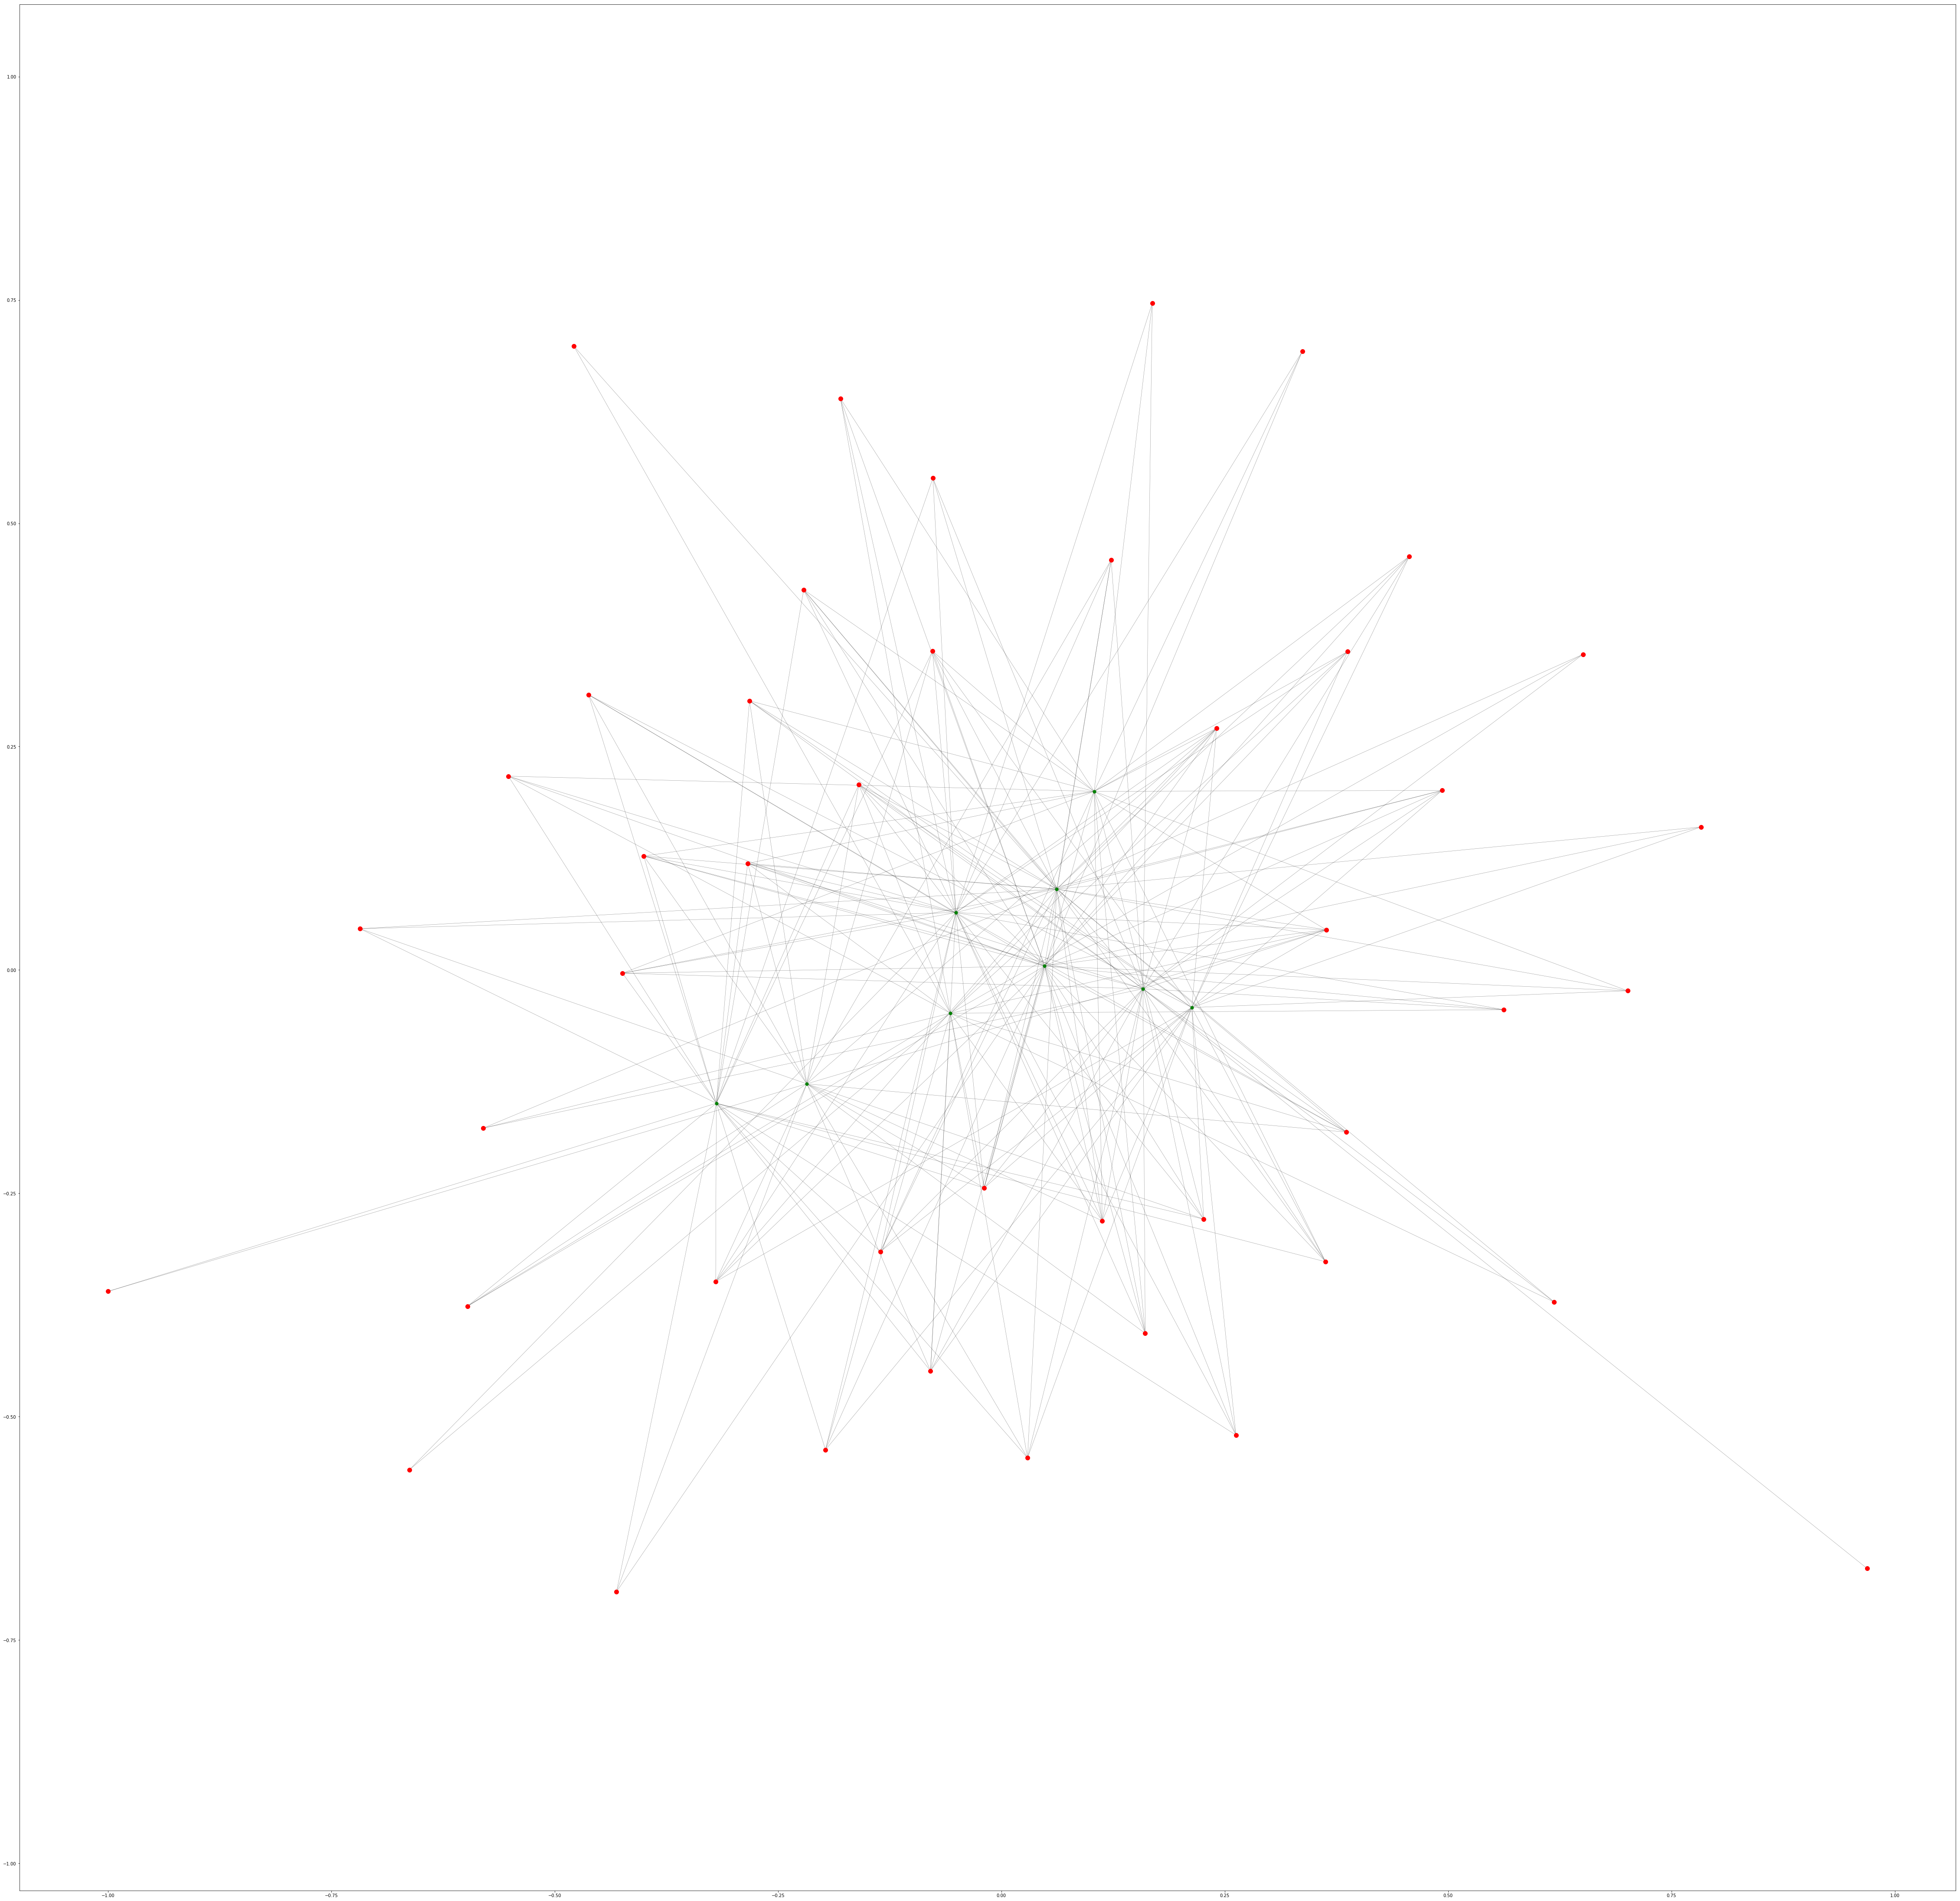

In [58]:
trolls_list = []
real_list = []
all_trolls = set(list(data['user_key']))
for node in list(G.nodes):
    if node in all_trolls:
        trolls_list.append(node)
    else:
        real_list.append(node)
plotGraph(G, trolls_list, real_list, title='testingCluster')

In [ ]:
def getLargestWCC(G):
    nodes_count = len(list(G.nodes))
    edges_count = len(list(G.edges))
    G.remove_nodes_from(list(nx.isolates(G)))
    largest_cc = max(nx.connected_component_subgraphs(G), key=len)
    print('Preserved nodes ', len(list(largest_cc.nodes))/nodes_count)
    print('Preserved edges ', len(list(largest_cc.edges))/edges_count)
    return largest_cc

In [ ]:
def getSubsetofData(data, largest_cc):
    nodes_in_cc = set(list(largest_cc.nodes))
    added_nodes = {}
    indexes_remove = []
    for index, row in data.iterrows():
        init_node = row['user_key']
        found_in_cc = False
        if init_node in nodes_in_cc:
            continue
        mentioned_list = ast.literal_eval(row['mentions'])
        for user in mentioned_list:
            if user in nodes_in_cc:
                found_in_cc = True
                break
        if found_in_cc:
            continue
        indexes_remove.append(index)

    return data.drop(indexes_remove)

In [44]:
def plotGraph(G, trolls_list, real_list, title='graph', no_labels=True):
    fig = plt.figure(figsize=(80, 80))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=real_list, node_color='g', node_size=50)
    nx.draw_networkx_nodes(G, pos, nodelist=trolls_list, node_color='r', node_size=100)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
    if not no_labels:
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', font_color="b")
    plt.axis('equal') 
    plt.show()
    fig.savefig(title + '.svg')
    fig.savefig(title + '.png') 

# Undirected Graph (Largest WCC)

In [ ]:
G = createGraph(data)
len(list(G.edges))
len(list(G.nodes))

In [ ]:
nx.get_node_attributes(G, 'start_date')['giselleevns']

In [ ]:
G = createGraph(data)
G = getLargestWCC(G)
trolls_list = []
real_list = []
all_trolls = set(list(data['user_key']))
for node in list(G.nodes):
    if node in all_trolls:
        trolls_list.append(node)
    else:
        real_list.append(node)
plotGraph(G, trolls_list, real_list, title='undirectedGraph')

## Only trolls

In [ ]:
G = createGraph(data, only_trolls=True)
G = getLargestWCC(G)
print(len(list(G.nodes)), len(list(G.edges)))
trolls_list = []
real_list = []
all_trolls = set(list(data['user_key']))
for node in list(G.nodes):
    if node in all_trolls:
        trolls_list.append(node)
    else:
        real_list.append(node)
plotGraph(G, trolls_list, real_list, title='only_trolls_undirected_labels_wcc', no_labels=False)

# Directed Graph (Largest WCC)

In [ ]:
G = createGraph(data)
G = getLargestWCC(G)
wcc_data = getSubsetofData(data, G)
G = createGraph(wcc_data, directed=True)
trolls_list = []
real_list = []
all_trolls = set(list(wcc_data['user_key']))
for node in list(G.nodes):
    if node in all_trolls:
        trolls_list.append(node)
    else:
        real_list.append(node)
plotGraph(G, trolls_list, real_list, title='directedGraph')

## Only trolls

In [ ]:
G = createGraph(data, only_trolls=True)
G = getLargestWCC(G)
wcc_data = getSubsetofData(data, G)
G = createGraph(wcc_data, directed=True, only_trolls=True)
print(len(list(G.nodes)), len(list(G.edges)))
trolls_list = []
real_list = []
all_trolls = set(list(wcc_data['user_key']))
for node in list(G.nodes):
    if node in all_trolls:
        trolls_list.append(node)
    else:
        real_list.append(node)
plotGraph(G, trolls_list, real_list, title='only_trolls_directed_labels_wcc', no_labels=False)

# Things to do
* Look at the most connected node
* Degrees of separation
* What about the other WCCs?
* Any fake users vs real users disparities?
* How much does the largest WCC account for in terms of nodes and edges?

In [ ]:
def subtractGraph(full, sub):
    print(len(full.nodes))
    remove_nodes = []
    for node in full.nodes:
        if node in sub:
            remove_nodes.append(node)
    full.remove_nodes_from(remove_nodes)
    print(len(full.nodes))
    return full

In [ ]:
#Network of trolls not connected to the trolls' largest WCC
G_full = createGraph(data, only_trolls=True)
G_WCC = getLargestWCC(G_full)
other_data = getSubsetofData(data, G_WCC)
G_other = createGraph(other_data, directed=True)
trolls_list = []
real_list = []
all_trolls = set(list(other_data['user_key']))
for node in list(G_other.nodes):
    if node in all_trolls:
        trolls_list.append(node)
    else:
        real_list.append(node)
plotGraph(G_other, trolls_list, real_list, title='newThing_test', no_labels=False)

In [ ]:
G = createGraph(data)
G = getLargestWCC(G)
wcc_data = getSubsetofData(data, G)
G_WCC = createGraph(wcc_data, directed=True) #Need this

data = pd.read_csv('../../../data/tweets.csv')
data = data[['user_key', 'mentions', 'created_at']]
G = createGraph(data, directed=True)
G_Other = subtractGraph(G, G_WCC) #Need this

G_trolls = createGraph(data, only_trolls=True)
G_trolls = getLargestWCC(G_trolls)
trolls_wcc_data = getSubsetofData(data, G_trolls)
G_trolls_WCC = createGraph(trolls_wcc_data, directed=True) #Need this

data = pd.read_csv('../../../data/tweets.csv')
data = data[['user_key', 'mentions', 'created_at']]
G_trolls = createGraph(data, directed=True, only_trolls=True)
G_trolls_Other = subtractGraph(G_trolls, G_trolls_WCC) #Need this

G = createGraph(data, directed=True)
G_trolls = createGraph(data, only_trolls=True, directed=True)
trolls_list = []
real_list = []
all_trolls = set(list(data['user_key']))
for node in list(G.nodes):
    if node in all_trolls:
        trolls_list.append(node)
    else:
        real_list.append(node)
# plotGraph(G, trolls_list, real_list, title='only_trolls_undirected_labels_wcc', no_labels=False)

In [ ]:
import json
data = {"nodes": [], "links": []}
start_dates=nx.get_node_attributes(G, 'start_date')
end_dates=nx.get_node_attributes(G, 'end_date')
edge_dates=nx.get_edge_attributes(G, 'date')
edge_weights = nx.get_edge_attributes(G, 'weight')

G_WCC_nodes = set(G_WCC.nodes)
G_Other_nodes = set(G_Other.nodes)
G_trolls_WCC_nodes = set(G_trolls_WCC.nodes)
G_trolls_Other_nodes = set(G_trolls_Other.nodes)
for node in list(G.nodes):
    group_1 = 'real'
    wcc = 0
    other = 0
    troll_wcc = 0
    troll_other = 0
    if node in G_WCC_nodes:
        wcc = 1
    if node in G_Other_nodes:
        other = 1
    if node in G_trolls_WCC_nodes:
        troll_wcc = 1
    if node in G_trolls_Other_nodes:
        troll_other = 1
    if node in all_trolls:
        group_1 = 'troll'
    data['nodes'].append({'id': node, 'type': group_1, 'count': G.degree(node),
                          'start_date': start_dates[node], 'end_date': end_dates[node],
                          'wcc': wcc, 'other': other, 'troll_wcc': troll_wcc, 'troll_other': troll_other})
    
G_WCC_edges = set(G_WCC.edges)
G_Other_edges = set(G_Other.edges)
G_trolls_WCC_edges = set(G_trolls_WCC.edges)
G_trolls_Other_edges = set(G_trolls_Other.edges)
G_trolls_edges = set(G_trolls.edges)
for edge in list(G.edges):
    group_1 = 'real'
    count = min(G.degree(edge[0]), G.degree(edge[1]))
    dates = "[" + str(edge_dates[edge]) + "]"
    wcc = 0
    other = 0
    troll_wcc = 0
    troll_other = 0
    if node in G_WCC_edges:
        wcc = 1
    if node in G_Other_edges:
        other = 1
    if node in G_trolls_WCC_edges:
        troll_wcc = 1
    if node in G_trolls_Other_edges:
        troll_other = 1
    if edge[0] in all_trolls and edge[1] in all_trolls:
        group_1 = 'troll'
    data['links'].append({"source": edge[0], "target": edge[1], "weight": edge_weights[edge], "dates": dates,
                          "type": group_1, 'wcc': wcc, 'other': other, 'troll_wcc': troll_wcc, 'troll_other': troll_other,
                          "count": count})
with open('graph_data.json', 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
edge_weights

In [ ]:
G = createGraph(data)
G = getLargestWCC(G)
wcc_data = getSubsetofData(data, G)
G = createGraph(wcc_data, directed=True)

In [ ]:
len(list(G.nodes))

In [ ]:
counter = 0
little_mention = 0
for node in G.nodes:
    if node not in all_trolls:
        counter += 1
        if G.degree(node) < 2:
            little_mention += 1
print(counter)
print(little_mention)

troll v real user, troll in the largest wcc, non-trolls with 2+ mentions, overview of all (not important)